# Exploratory Task 3


In this task, we are initially checking for missing/null values in the US-All datasets and the X dataset. 

There is a date format difference between US-All datasets and our X (Homelessness) dataset. 
Our X dataset had the format mm/dd/yyyy whereas the US-All dataset has yyyy-mm-dd. We have converted X dataset format to yyyy-mm-dd.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
us_confirmed = pd.read_csv("US-all/US_confirmed.csv")
us_deaths = pd.read_csv("US-all/US_deaths.csv")
homeless = pd.read_csv("US-all/DHS_Daily_Report.csv")

In [3]:
#Checking for null values in dataset

print(us_confirmed.isnull().values.any())
print(us_deaths.isnull().values.any())
print(homeless.isnull().values.any())

False
False
False


There are **no missing values** in any of the datasets.

In [4]:
#Converting date in homeless dataset to consistent format - yyyy-mm-dd, and sorting it in descending order

homeless['Date of Census'] = pd.to_datetime(homeless['Date of Census'])
homeless.sort_values(by=['Date of Census'], inplace=True, ascending=False)

In [5]:
homeless.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2792,2021-05-10,33430,15504,48934,13565,4361,17926,8920,11728,15504,27232,1795,3776
2791,2021-05-09,33565,15619,49184,13614,4346,17960,8981,11814,15619,27433,1802,3791
2790,2021-05-08,33466,15630,49096,13479,4360,17839,8994,11833,15630,27463,1804,3794
2789,2021-05-07,33511,15606,49117,13490,4377,17867,8999,11844,15606,27450,1807,3800
2788,2021-05-06,33560,15587,49147,13551,4389,17940,8985,11828,15587,27415,1803,3792


In [6]:
def plotGraph(date,data):
    plt.plot(date,data,label="Total Homeless")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.xticks(rotation=30)
    plt.show()

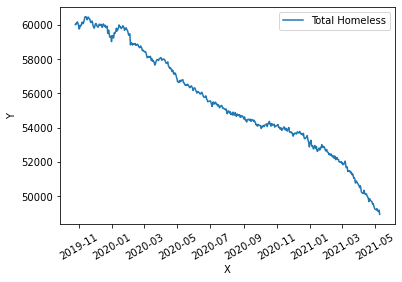

In [7]:
date = homeless['Date of Census'][:600]
individualsInShelter = homeless['Total Individuals in Shelter'][:600]
plotGraph(date,individualsInShelter)

As we are using entire US data, and don't need individual state level data for our X dataset, we have added the values in US_deaths datasets to get the total deaths and added it as a new column.

In [8]:
us_deaths_transposed = us_deaths.T
new_header = us_deaths_transposed.iloc[0] #grab the first row for the header
us_deaths_transposed= us_deaths_transposed[1:] #take the data less the header row
us_deaths_transposed.columns = new_header #set the header row as the df header
us_deaths_transposed['total_death'] = us_deaths_transposed.sum(axis =1)

In [9]:
date = us_deaths_transposed.index
us_deaths_transposed['date'] = date

The data given in US_deaths is cumulative, so we have converted it into per day stats.

In [10]:
us_deaths_transposed = us_deaths_transposed.set_index('date').diff()

In [11]:
us_deaths_transposed = us_deaths_transposed.reset_index()

As we are using entire US data, and don't need individual state level data for our X dataset, we have added the values in US_confirmed datasets to get the total confirmed cases and added it as a new column.

In [12]:
us_confirmed_transposed = us_confirmed.T
new_header = us_confirmed_transposed.iloc[0] #grab the first row for the header
us_confirmed_transposed= us_confirmed_transposed[1:] #take the data less the header row
us_confirmed_transposed.columns = new_header #set the header row as the df header
us_confirmed_transposed['total_confirmed'] = us_confirmed_transposed.sum(axis =1)

In [13]:
date = us_confirmed_transposed.index
us_confirmed_transposed['date'] = date

The data given in US_deaths is cumulative, so we have converted it into per day stats.

In [14]:
us_confirmed_transposed = us_confirmed_transposed.set_index('date').diff()

In [15]:
us_confirmed_transposed = us_confirmed_transposed.reset_index()

## Inference 2 : Chi-Square Test

In this inference, we are checking if the covid vaccination had an impact on the homeless people in the shelter.
We have chosen 60 days before and after the vaccination drive started in the USA (2020-12-14). 
From the US-all datasets, we are taking the total covid deaths and total covid confirmed cases.
From the X (Homeless) dataset, we are taking the total homeless men and the total homeless women in the shelter.

Our null hypothesis is that the underlying distributions both datasets are independent, i.e, the vaccination drive did not have an impact on the distributions, and the distribution of US cases and deaths is independent of distribution of the number of single men and single women in the shelter.

We are taking threshold as alpha = 0.05

In [16]:
#homeless dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

homeless_after_vaccine = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-12-14'))][-60:]
homeless_before_vaccine = homeless[(homeless['Date of Census'].dt.strftime('%Y-%m-%d') <= '2020-12-14')][:60]

In [17]:
#us_deaths dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

us_deaths_after_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] >= '2020-12-14'))][:60]
us_deaths_before_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] <= '2020-12-14'))][-60:]

In [18]:
#us_confirmed dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

us_confirmed_after_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-12-14'))][:60]
us_confirmed_before_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] <= '2020-12-14'))][-60:]

In [19]:
# observed values for the chi-squared test - The rows are before/after vaccine, and columns are confirmed covid cases, 
# covid deaths,homeless women in shelter, homeless men in shelter.

observed_values = np.zeros([2,4],int)
observed_values[0][0] = us_confirmed_before_vaccine['total_confirmed'].sum()
observed_values[1][0] = us_confirmed_after_vaccine['total_confirmed'].sum()
observed_values[0][1] = us_deaths_before_vaccine['total_death'].sum()
observed_values[1][1] = us_deaths_after_vaccine['total_death'].sum()
observed_values[0][2] = homeless_before_vaccine['Single Adult Men in Shelter'].sum()
observed_values[1][2] = homeless_after_vaccine['Single Adult Men in Shelter'].sum()
observed_values[0][3] = homeless_before_vaccine['Single Adult Women in Shelter'].sum()
observed_values[1][3] = homeless_after_vaccine['Single Adult Women in Shelter'].sum()

rows = 2
cols = 4

df = (rows-1)*(cols-1)

total_row1,total_row2= np.sum(observed_values,axis=1)
total_col1,total_col2,total_col3,total_col4  = np.sum(observed_values,axis=0)


total = total_row1+total_row2 

#expected values for the chi-squared test
expected_values = np.zeros([2,4])
expected_values[0][0] = (float(total_col1)*total_row1)/(total)
expected_values[1][0] = (float(total_col1)*total_row2)/(total)
expected_values[0][1] = (float(total_col2)*total_row1)/(total)
expected_values[1][1] = (float(total_col2)*total_row2)/(total)
expected_values[0][2] = (float(total_col3)*total_row1)/(total)
expected_values[1][2] = (float(total_col3)*total_row2)/(total)
expected_values[0][3] = (float(total_col4)*total_row1)/(total)
expected_values[1][3] = (float(total_col4)*total_row2)/(total)

#calculating q_expected value
q_expected = 0.0
for i in range(rows):
    for j in range(cols):
        q_expected += ((expected_values[i][j] - observed_values[i][j])**2)/float(expected_values[i][j])
        

#Displaying chi-square table as a dataframe        
df_ar1 = pd.DataFrame()
df_ar1['Date'] = ['Before Vaccine','After Vaccine']
df_ar1['Observed_Covid_Cases'] = observed_values[:,0]
df_ar1['Expected_Covid_Cases'] = expected_values[:,0]
df_ar1['Observed_Covid_Deaths'] = observed_values[:,1]
df_ar1['Expected_Covid_Deaths'] = expected_values[:,1]
df_ar1['Observed_Men_In_Shelter'] = observed_values[:,2]
df_ar1['Expected_Men_In_Shelter'] = expected_values[:,2]
df_ar1['Observed_Women_In_Shelter'] = observed_values[:,3]
df_ar1['Expected_Women_In_Shelter'] = expected_values[:,3]

print("\nChi squared table")
df_ar1


Chi squared table


,Date,Observed_Covid_Cases,Expected_Covid_Cases,Observed_Covid_Deaths,Expected_Covid_Deaths,Observed_Men_In_Shelter,Expected_Men_In_Shelter,Observed_Women_In_Shelter,Expected_Women_In_Shelter
0,Before Vaccine,8295574,8.396023e+06,80520,110338.476274,817863,721555.665338,272230,238270.345545
1,After Vaccine,10938538,1.083809e+07,172250,142431.523726,835120,931427.334662,273614,307573.654455


In [20]:
print("Q_expected : ", q_expected)
print("Degrees of freedom : ",df)

Q_expected :  47835.53178643774
Degrees of freedom :  3


We are taking alpha = 0.05
Since Q statistic is 47835( really large), with degrees of freedom = 3, we got from the p value calculator that the p-value will be < 0.00001 (really small).

The P-Value is < .00001. The result is significant at alpha < .05.

Hence, we reject the null hypothesis, and the initial covid vaccination drive of 14th December, 2020 had an impact, i.e, distribution of X = Men/Women in Shelters is dependent on the distribution of Y = US all cases/deaths.
